In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, "../../lib"));

In [2]:
using BenchmarkTools
using NLopt
using Statistics
using PyPlot

In [3]:
using MSSim
const Opts = MSSim.Optimizers
const SS = MSSim.SegSeq
const SL = MSSim.SymLinear
const Seq = MSSim.Sequence

MSSim.Sequence

In [4]:
const radial_modes = [
    2.35809,
    2.40675,
    2.44923,
    2.48561,
    2.5164,
    2.54068,
    2.55792
];
const lamb_dicke_parameters = [
    0.12535185674701685,
    0.12411265750465082,
    0.12305413516480627,
    0.12216335005557813,
    0.12143343371677694,
    0.12086534864431214,
    0.12047167276221905
];
const participation_factors = [
    0.02222009251306859 -0.1722648656984975 0.48939776715759997 -0.678705987944334 0.4893977671575958 -0.17226486569849606 0.022220092513065576
    -0.08507556148734259 0.4120558633416861 -0.5683063560469468 0.0 0.5683063560469427 -0.4120558633416741 0.08507556148733478
    -0.21303936535968387 0.5714074376873661 -0.11990319870608773 -0.4769297472432097 -0.1199031987060997 0.5714074376873872 -0.2130393653596884
    0.39521513624944005 -0.44499802171470876 -0.38181377234109953 0.0 0.38181377234109876 0.4449980217146981 -0.39521513624943017
    0.5579098076201139 -0.031003440845807535 -0.3213345695440472 -0.41114359446049004 -0.3213345695440565 -0.031003440845817597 0.5579098076201152
    -0.5801440725517667 -0.3635749250921281 -0.1767657459105281 0.0 0.176765745910517 0.3635749250921191 0.5801440725517734
    0.37796447300922137 0.37796447300923375 0.37796447300922364 0.3779644730092235 0.37796447300922775 0.37796447300923464 0.37796447300922603
];

In [5]:
const seq_amps = [
    0.011108996538242316,
    0.011108996538242316,
    0.011108996538242316,
    0.01722747131163513,
    0.01722747131163513,
    0.01722747131163513,
    0.026121409853918247,
    0.026121409853918247,
    0.026121409853918247,
    0.038725770351664364,
    0.038725770351664364,
    0.038725770351664364,
    0.05613476283413375,
    0.05613476283413375,
    0.05613476283413375,
    0.07955950871822771,
    0.07955950871822771,
    0.07955950871822771,
    0.11025052530448527,
    0.11025052530448527,
    0.11025052530448527,
    0.1493817752504181,
    0.1493817752504181,
    0.1493817752504181,
    0.1978986990836147,
    0.1978986990836147,
    0.1978986990836147,
    0.25634015141507366,
    0.25634015141507366,
    0.25634015141507366,
    0.3246524673583498,
    0.3246524673583498,
    0.3246524673583498,
    0.4020213830946549,
    0.4020213830946549,
    0.4020213830946549,
    0.4867522559599718,
    0.4867522559599718,
    0.4867522559599718,
    0.5762290736718,
    0.5762290736718,
    0.5762290736718,
    0.6669768108584744,
    0.6669768108584744,
    0.6669768108584744,
    0.7548396019890075,
    0.7548396019890075,
    0.7548396019890075,
    0.835270211411272,
    0.835270211411272,
    0.835270211411272,
    0.903707077873196,
    0.903707077873196,
    0.903707077873196,
    0.9559974818331001,
    0.9559974818331001,
    0.9559974818331001,
    0.9888130446112331,
    0.9888130446112331,
    0.9888130446112331,
    0.9888130446112331,
    0.9888130446112331,
    0.9888130446112331,
    0.9559974818331001,
    0.9559974818331001,
    0.9559974818331001,
    0.903707077873196,
    0.903707077873196,
    0.903707077873196,
    0.835270211411272,
    0.835270211411272,
    0.835270211411272,
    0.7548396019890075,
    0.7548396019890075,
    0.7548396019890075,
    0.6669768108584744,
    0.6669768108584744,
    0.6669768108584744,
    0.5762290736718,
    0.5762290736718,
    0.5762290736718,
    0.4867522559599718,
    0.4867522559599718,
    0.4867522559599718,
    0.4020213830946549,
    0.4020213830946549,
    0.4020213830946549,
    0.3246524673583498,
    0.3246524673583498,
    0.3246524673583498,
    0.25634015141507366,
    0.25634015141507366,
    0.25634015141507366,
    0.1978986990836147,
    0.1978986990836147,
    0.1978986990836147,
    0.1493817752504181,
    0.1493817752504181,
    0.1493817752504181,
    0.11025052530448527,
    0.11025052530448527,
    0.11025052530448527,
    0.07955950871822771,
    0.07955950871822771,
    0.07955950871822771,
    0.05613476283413375,
    0.05613476283413375,
    0.05613476283413375,
    0.038725770351664364,
    0.038725770351664364,
    0.038725770351664364,
    0.026121409853918247,
    0.026121409853918247,
    0.026121409853918247,
    0.01722747131163513,
    0.01722747131163513,
    0.01722747131163513,
    0.011108996538242316,
    0.011108996538242316,
    0.011108996538242316
];
const seq_phases = [
    0.04539316451146533,
    0.04539316451146533,
    0.04539316451146533,
    -0.09305938138992186,
    -0.09305938138992186,
    -0.09305938138992186,
    0.12906091898771374,
    0.12906091898771374,
    0.12906091898771374,
    -0.10624913352842268,
    -0.10624913352842268,
    -0.10624913352842268,
    -0.21343018301211758,
    -0.21343018301211758,
    -0.21343018301211758,
    -0.1725917723257835,
    -0.1725917723257835,
    -0.1725917723257835,
    0.14366688354620583,
    0.14366688354620583,
    0.14366688354620583,
    0.1056870089146324,
    0.1056870089146324,
    0.1056870089146324,
    0.09392925764126826,
    0.09392925764126826,
    0.09392925764126826,
    0.07561049686587155,
    0.07561049686587155,
    0.07561049686587155,
    0.02838068254835488,
    0.02838068254835488,
    0.02838068254835488,
    -0.009193495831635179,
    -0.009193495831635179,
    -0.009193495831635179,
    -0.04960994601290684,
    -0.04960994601290684,
    -0.04960994601290684,
    -0.03782275065543828,
    -0.03782275065543828,
    -0.03782275065543828,
    0.020411094108020778,
    0.020411094108020778,
    0.020411094108020778,
    0.03751188355415214,
    0.03751188355415214,
    0.03751188355415214,
    -0.014046577231951062,
    -0.014046577231951062,
    -0.014046577231951062,
    -0.04654170597193271,
    -0.04654170597193271,
    -0.04654170597193271,
    -0.04642842685407951,
    -0.04642842685407951,
    -0.04642842685407951,
    0.00043015447891028846,
    0.00043015447891028846,
    0.00043015447891028846,
    0.00043015447891028846,
    0.00043015447891028846,
    0.00043015447891028846,
    -0.04642842685407951,
    -0.04642842685407951,
    -0.04642842685407951,
    -0.04654170597193271,
    -0.04654170597193271,
    -0.04654170597193271,
    -0.014046577231951062,
    -0.014046577231951062,
    -0.014046577231951062,
    0.03751188355415214,
    0.03751188355415214,
    0.03751188355415214,
    0.020411094108020778,
    0.020411094108020778,
    0.020411094108020778,
    -0.03782275065543828,
    -0.03782275065543828,
    -0.03782275065543828,
    -0.04960994601290684,
    -0.04960994601290684,
    -0.04960994601290684,
    -0.009193495831635179,
    -0.009193495831635179,
    -0.009193495831635179,
    0.02838068254835488,
    0.02838068254835488,
    0.02838068254835488,
    0.07561049686587155,
    0.07561049686587155,
    0.07561049686587155,
    0.09392925764126826,
    0.09392925764126826,
    0.09392925764126826,
    0.1056870089146324,
    0.1056870089146324,
    0.1056870089146324,
    0.14366688354620583,
    0.14366688354620583,
    0.14366688354620583,
    -0.1725917723257835,
    -0.1725917723257835,
    -0.1725917723257835,
    -0.21343018301211758,
    -0.21343018301211758,
    -0.21343018301211758,
    -0.10624913352842268,
    -0.10624913352842268,
    -0.10624913352842268,
    0.12906091898771374,
    0.12906091898771374,
    0.12906091898771374,
    -0.09305938138992186,
    -0.09305938138992186,
    -0.09305938138992186,
    0.04539316451146533,
    0.04539316451146533,
    0.04539316451146533
];

In [6]:
const seq_freq = mean(radial_modes)
const seq_params_raw0 = Float64[]
const seq_nseg = length(seq_phases)
const seq_step_t = 250 / seq_nseg
for (Ω, φ) in zip(seq_amps, seq_phases)
    push!(seq_params_raw0, seq_step_t) # τ
    push!(seq_params_raw0, Ω) # Ω
    push!(seq_params_raw0, 0) # Ω′
    push!(seq_params_raw0, φ * 2π) # φ
    push!(seq_params_raw0, 0) # ω
end
const seq_params_raw = Seq.adjust(Seq.RawParams(seq_params_raw0), δ=seq_freq * 2π);

In [7]:
const buf = SL.ComputeBuffer{seq_nseg,Float64}(Val(SS.mask_full), Val(SS.mask_full))
const kern = SL.Kernel(buf, Val(SL.pmask_full));

In [8]:
const modes = Seq.Modes()
const ion1 = 2
const ion2 = 6
for i in 1:7
    push!(modes, 2π * radial_modes[i], participation_factors[i, ion1] * participation_factors[i, ion2] * lamb_dicke_parameters[i]^2)
end

In [9]:
Seq.total_dis(kern, seq_params_raw, modes)

5.316187462699098e-5

In [10]:
Seq.total_cumdis(kern, seq_params_raw, modes)

378748.4899382471

In [11]:
Seq.total_disδ(kern, seq_params_raw, modes)

378559.23052433814

In [12]:
Seq.total_area(kern, seq_params_raw, modes)

4.472080553882342

In [13]:
Seq.total_areaδ(kern, seq_params_raw, modes)

21.293843901398724

In [14]:
plot_δs = range(-0.1, 0.1, 1001); # kHz

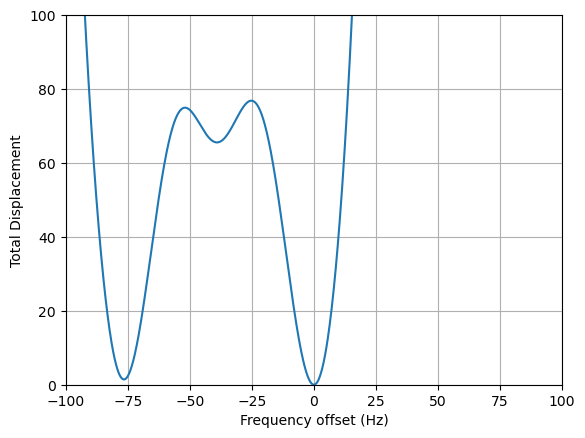

In [15]:
plot(plot_δs .* 1000, [Seq.total_dis(kern, Seq.adjust(seq_params_raw, δ=δ), modes) for δ in plot_δs])
xlim([-100, 100])
ylim([0, 100])
xlabel("Frequency offset (Hz)")
ylabel("Total Displacement")
grid()

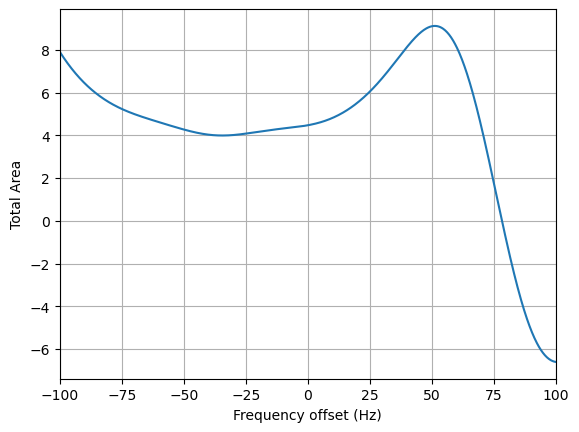

In [16]:
plot(plot_δs .* 1000, [Seq.total_area(kern, Seq.adjust(seq_params_raw, δ=δ), modes) for δ in plot_δs])
xlim([-100, 100])
xlabel("Frequency offset (Hz)")
ylabel("Total Area")
grid()